<a href="https://colab.research.google.com/github/pingao2019/DS-Unit-4-Sprint-1-NLP/blob/master/LS_DS_414_Topic_Modeling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [0]:
import pandas as pd
df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [0]:
# Much cleaner
df['brand'] = df['brand'].apply(lambda x: x.lower())
df['brand'].value_counts()

amazon          16153
amazonbasics    12179
Name: brand, dtype: int64

In [0]:
df.shape

(28332, 24)

In [0]:
pd.set_option('display.max_colwidth', -1)
df.head(2)

C:\Users\abc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7UlL._SS40_.jpg,https://www.upccodesearch.com/images/barcode/0841710106442.png,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51DfBuqy4qL._SL1189_.jpg,https://images-na.ssl-images-amazon.com/images/I/51TshsEJTIL.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%25252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51g3uIwzOIL._SL1050_.jpg,http://ecx.images-amazon.com/images/I/613LUdOc1eL._SS40_.jpg","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9P0O/,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.,... 3 of them and one of the item is bad quality. Is missing backup spring so I have ...,Byger yang,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO/,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-Count/dp/B00LH3DMUO,https://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-36-Pack/dp/B00LH3DMUO/,http://www.amazon.com/AmazonBasics-Performance-Alkaline-Batteries-36-Pack/dp/B00LH3DMUO"
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81ZTa1BrkzL._SL1500_.jpg,http://ecx.images-amazon.com/images/I/41pSoRu7UlL._SS40_.jpg,https://www.upccodesearch.com/images/barcode/0841710106442.png,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51DfBuqy4qL._SL1189_.jpg,https://images-na.ssl-images-amazon.com/images/I/51TshsEJTIL.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%25252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2525252BkL._SL1500_.jpg,https://images-na.ssl-images-amazon.com/images/I/51g3uIwzOIL._SL1050_.jpg,http://ecx.images-amazon.com/images/I/613LUdOc1eL._SS40_.jpg","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,0841710106442,841710106442,amazonbasicsaaaperformancealkalinebatteries36count/b00qwo9p0o",...,NaN,NaN,NaN,NaN,4,https://www.amazon.c

In [0]:
# For teaching compute time
df = df.sample(5000)

In [0]:
#df['review'] = df['review'].apply(lambda x: x.replace("<br />", ""))

In [0]:
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [0]:
df['tokens'].head()

0    [I, order, 3, of, them, and, one, of, the, item, is, bad, quality., Is, missing, backup, spring, so, I, have, to, put, a, pcs, of, aluminum, to, make, the, battery, work.]
1    [Bulk, is, always, the, less, expensive, way, to, go, for, products, like, these]                                                                                          
2    [Well, they, are, not, Duracell, but, for, the, price, i, am, happy.]                                                                                                      
3    [Seem, to, work, as, well, as, name, brand, batteries, at, a, much, better, price]                                                                                         
4    [These, batteries, are, very, long, lasting, the, price, is, great.]                                                                                                       
Name: tokens, dtype: object

In [0]:
#(tokens) == df.shape[0]

In [0]:
## Using Lemmas as our tokens

tokens = []

for doc in nlp.pipe(df['reviews.text']):
    
    doc_tokens = []
    
    for token in doc:
        if ((token.is_stop != True) and (token.pos_ != 'PRON')) and (token.is_punct !=True):
            doc_tokens.append(token.lemma_.strip())
            
    tokens.append(doc_tokens)

In [0]:
tokens[0]

['order',
 '3',
 'item',
 'bad',
 'quality',
 'miss',
 'backup',
 'spring',
 'pc',
 'aluminum',
 'battery',
 'work']

In [0]:
#Gensim LDA Topic Modeling

import gensim

from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore


id2word = corpora.Dictionary(tokens) #A list of list of tokens 

In [0]:
len(id2word.keys())

9705

In [0]:
id2word.filter_extremes(no_below=5, no_above=.95)
len(id2word.keys())

3082

In [0]:
corpora = [id2word.doc2bow(doc) for doc in tokens]
corpora[5]

[(3, 2),
 (19, 2),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 2),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 2),
 (36, 1),
 (37, 1)]

In [0]:
lda = LdaMulticore(corpus=corpora,
                  id2word=id2word,
                  num_topics=15, 
                  passes=50)
lda.print_topics()

[(0,
  '0.144*"battery" + 0.042*"long" + 0.037*"brand" + 0.020*"buy" + 0.018*"Amazon" + 0.012*"life" + 0.012*"time" + 0.012*"price" + 0.012*"like" + 0.011*"work"'),
 (1,
  '0.067*"Kindle" + 0.051*"Fire" + 0.032*"new" + 0.031*"tablet" + 0.027*"8" + 0.027*"love" + 0.026*"fire" + 0.022*"old" + 0.022*"buy" + 0.022*"reader"'),
 (2,
  '0.230*"tablet" + 0.059*"great" + 0.040*"Amazon" + 0.032*"need" + 0.031*"good" + 0.021*"user" + 0.016*"friendly" + 0.016*"want" + 0.015*"memory" + 0.014*"card"'),
 (3,
  '0.222*"work" + 0.080*"far" + 0.058*"good" + 0.042*"expect" + 0.037*"fine" + 0.027*"item" + 0.023*"issue" + 0.020*"order" + 0.017*"time" + 0.016*"recommend"'),
 (4,
  '0.093*"book" + 0.073*"read" + 0.056*"game" + 0.045*"use" + 0.043*"watch" + 0.037*"movie" + 0.026*"love" + 0.026*"play" + 0.024*"video" + 0.024*"great"'),
 (5,
  '0.082*"year" + 0.076*"old" + 0.050*"love" + 0.031*"tablet" + 0.028*"buy" + 0.022*"2" + 0.020*"kid" + 0.019*"control" + 0.017*"3" + 0.016*"time"'),
 (6,
  '0.046*"screen"

In [0]:
import re
words = [re.findall('"([^"]*)"',t[1]) for t in lda.print_topics()]

In [0]:
topics = [' '.join(t[0:5]) for t in words]


for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
battery long brand buy Amazon

------ Topic 1 ------
Kindle Fire new tablet 8

------ Topic 2 ------
tablet great Amazon need good

------ Topic 3 ------
work far good expect fine

------ Topic 4 ------
book read game use watch

------ Topic 5 ------
year old love tablet buy

------ Topic 6 ------
screen light size read device

------ Topic 7 ------
easy use love great set

------ Topic 8 ------
charge day buy problem time

------ Topic 9 ------
app download store Amazon like

------ Topic 10 ------
love buy gift purchase happy

------ Topic 11 ------
sound speaker Alexa great Amazon

------ Topic 12 ------
great price good product battery

------ Topic 13 ------
kid tablet love great good

------ Topic 14 ------
kindle excellent fire amazon thank



Interpret LDA Results¶
Topic Term Distribution (how good is our LDA model?) / what are the topics
Document Topic Distribution
What are the documents about?
What are the most common themes(topics)?
What topics are associated with positive and negative sentiment?

In [0]:
# Part 1: Topic Distance Visualization
"""
Tells us if the topics are distinct, and what terms are most import important to the topic distribution.
"""

import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda,corpora,id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.159872 -0.093559  1       1        18.115841
5     -0.243276  0.022522  2       1        8.546909 
6      0.066620 -0.158515  3       1        7.994481 
12     0.194322  0.237449  4       1        7.844527 
8      0.060303 -0.122558  5       1        6.761498 
1     -0.067122 -0.085004  6       1        6.645911 
4     -0.188818 -0.030314  7       1        6.200997 
13    -0.175985  0.087262  8       1        6.042444 
2      0.006446  0.021499  9       1        5.602767 
9      0.048383 -0.200431  10      1        5.027850 
11    -0.001759 -0.181924  11      1        4.940545 
7     -0.148016  0.101948  12      1        4.577568 
10    -0.136297  0.185677  13      1        4.493865 
3      0.243332  0.106097  14      1        4.443664 
14     0.181994  0.109851  15      1        2.761136 , topic_info=         Term         Freq        Total Category  logprob  loglift
2069  tablet   7447.000000  7447.000000  Default  30.0000  30.0000
3     battery  9390.000000  9390.000000  Default  29.0000  29.0000
10    work     4464.000000  4464.000000  Default  28.0000  28.0000
31    easy     3345.000000  3345.000000  Default  27.0000  27.0000
18    price    5028.000000  5028.000000  Default  26.0000  26.0000
...     ...            ...          ...      ...      ...      ...
59    basic    51.423851    375.161163   Topic15 -5.1379   1.6023 
89    want     63.096859    1294.411621  Topic15 -4.9333   0.5684 
98    need     66.724518    1847.110352  Topic15 -4.8774   0.2687 
62    find     46.110550    885.306763   Topic15 -5.2470   0.6346 
218   new      44.690002    1039.154785  Topic15 -5.2783   0.4431 

[990 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2394  3      0.225135  $      
2394  5      0.194828  $      
2394  6      0.129885  $      
2394  9      0.331208  $      
2394  10     0.116897  $      
...  ..           ... ..      
2619  7      0.934174  youtube
2619  11     0.057488  youtube
1085  6      0.523493  yr     
1085  10     0.474796  yr     
2659  10     0.963818  yrs    

[1817 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 7, 13, 9, 2, 5, 14, 3, 10, 12, 8, 11, 4, 15])

In [0]:
# Part 2: What are the documents about? 

lda[corpora[0]]

[(3, 0.41413686), (8, 0.25819427), (12, 0.2609908)]

In [0]:
distro = [lda[d] for d in corpora]

In [0]:
def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [0]:
doc_topics = pd.DataFrame.from_records(new_distro)
doc_topics.columns = topics

doc_topics.head()

,battery long brand buy Amazon,Kindle Fire new tablet 8,tablet great Amazon need good,work far good expect fine,book read game use watch,year old love tablet buy,screen light size read device,easy use love great set,charge day buy problem time,app download store Amazon like,love buy gift purchase happy,sound speaker Alexa great Amazon,great price good product battery,kid tablet love great good,kindle excellent fire amazon thank
0,0.000000,0.000000,0.000000,0.414137,0.000000,0.000000,0.000000,0.000000,0.258194,0.000000,0.000000,0.000000,0.260990,0.000000,0.000000
1,0.628342,0.011111,0.011112,0.011112,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011112,0.011111,0.227209
2,0.288254,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.266669,0.016667,0.245073,0.016667,0.016667
3,0.547086,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.308468,0.011111,0.011111
4,0.499603,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.355952,0.011111,0.011111


In [0]:
doc_topics['primary_topic'] = doc_topics.idxmax(axis=1)

In [0]:
doc_topics['primary_topic'].value_counts()

battery long brand buy Amazon         6246
great price good product battery      4395
year old love tablet buy              2427
kid tablet love great good            1787
screen light size read device         1612
love buy gift purchase happy          1543
Kindle Fire new tablet 8              1529
book read game use watch              1516
work far good expect fine             1463
tablet great Amazon need good         1324
easy use love great set               1267
charge day buy problem time           979 
app download store Amazon like        844 
sound speaker Alexa great Amazon      825 
kindle excellent fire amazon thank    575 
Name: primary_topic, dtype: int64

In [0]:
#Selecting the Number of Topics (Learn)



from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=12)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [0]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpora,
                                                        start=3, 
                                                        limit=40, 
                                                        step=2,
                                                        passes=1)

In [0]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

topic_coherence.head()

,pass,num_topics,coherence_score
0,0,3,-2.319472
1,0,5,-2.334697
2,0,7,-2.338506
3,0,9,-2.335249
4,0,11,-2.353888


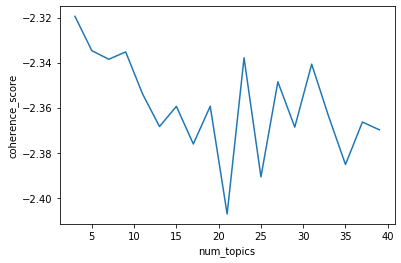

In [0]:
import seaborn as sns
 
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

# Selecting the Number of Topics (Learn)
<a id="#p4"></a>

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling